<a href="https://colab.research.google.com/github/vidatriaaa/homework-rakamin/blob/main/Homework_Rakamin_Trial_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
import pandas as pd


In [ ]:
df_dataset = pd.read_csv('online_retail_II.csv')

## Section 1

In [ ]:
df_dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
447149,531971,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,2010-11-10 12:24:00,1.25,13464.0,United Kingdom
447150,531971,22236,CAKE STAND 3 TIER MAGIC GARDEN,1,2010-11-10 12:24:00,12.75,13464.0,United Kingdom
447151,531971,21452,TOADSTOOL MONEY BOX,6,2010-11-10 12:24:00,2.95,13464.0,United Kingdom
447152,531971,22299,PIG KEYRING WITH LIGHT & SOUND,24,2010-11-10 12:24:00,1.25,13464.0,United Kingdom


In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447154 entries, 0 to 447153
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      447154 non-null  object        
 1   StockCode    447154 non-null  object        
 2   Description  444407 non-null  object        
 3   Quantity     447154 non-null  int64         
 4   InvoiceDate  447154 non-null  datetime64[ns]
 5   Price        447153 non-null  float64       
 6   Customer ID  359156 non-null  float64       
 7   Country      447153 non-null  object        
 8   Year         447154 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.7+ MB


### Create New Feature: Year

In [ ]:
from datetime import datetime

In [ ]:
df_dataset['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 447154 entries, 0 to 447153
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
447154 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.4 MB


In [ ]:
df_dataset['InvoiceDate'] = pd.to_datetime(df_dataset['InvoiceDate'], format='%Y-%m-%d')
df_dataset['InvoiceDate']

0        2009-12-01 07:45:00
1        2009-12-01 07:45:00
2        2009-12-01 07:45:00
3        2009-12-01 07:45:00
4        2009-12-01 07:45:00
                 ...        
447149   2010-11-10 12:24:00
447150   2010-11-10 12:24:00
447151   2010-11-10 12:24:00
447152   2010-11-10 12:24:00
447153   2010-11-10 12:00:00
Name: InvoiceDate, Length: 447154, dtype: datetime64[ns]

In [ ]:
df_dataset['Year'] = (df_dataset['InvoiceDate'].dt.year)

df_dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
447149,531971,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,2010-11-10 12:24:00,1.25,13464.0,United Kingdom,2010
447150,531971,22236,CAKE STAND 3 TIER MAGIC GARDEN,1,2010-11-10 12:24:00,12.75,13464.0,United Kingdom,2010
447151,531971,21452,TOADSTOOL MONEY BOX,6,2010-11-10 12:24:00,2.95,13464.0,United Kingdom,2010
447152,531971,22299,PIG KEYRING WITH LIGHT & SOUND,24,2010-11-10 12:24:00,1.25,13464.0,United Kingdom,2010


### Filtering Data

In [43]:
#Quantity minimal 1 tidak boleh 0 dan minus
df_dataset[df_dataset['Quantity'] >= 1]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
447149,531971,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,2010-11-10 12:24:00,1.25,13464.0,United Kingdom,2010
447150,531971,22236,CAKE STAND 3 TIER MAGIC GARDEN,1,2010-11-10 12:24:00,12.75,13464.0,United Kingdom,2010
447151,531971,21452,TOADSTOOL MONEY BOX,6,2010-11-10 12:24:00,2.95,13464.0,United Kingdom,2010
447152,531971,22299,PIG KEYRING WITH LIGHT & SOUND,24,2010-11-10 12:24:00,1.25,13464.0,United Kingdom,2010


In [53]:
#Kolom Invoice tidak booleh mengandung C

df_dataset[df_dataset['Invoice']!= "C"]



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
447149,531971,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,2010-11-10 12:24:00,1.25,13464.0,United Kingdom,2010,15.00
447150,531971,22236,CAKE STAND 3 TIER MAGIC GARDEN,1,2010-11-10 12:24:00,12.75,13464.0,United Kingdom,2010,12.75
447151,531971,21452,TOADSTOOL MONEY BOX,6,2010-11-10 12:24:00,2.95,13464.0,United Kingdom,2010,17.70
447152,531971,22299,PIG KEYRING WITH LIGHT & SOUND,24,2010-11-10 12:24:00,1.25,13464.0,United Kingdom,2010,30.00


### Create New Feature: Revenue

In [52]:
df_dataset['Revenue'] = (df_dataset['Quantity'] * df_dataset['Price'])
df_dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
447149,531971,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,2010-11-10 12:24:00,1.25,13464.0,United Kingdom,2010,15.00
447150,531971,22236,CAKE STAND 3 TIER MAGIC GARDEN,1,2010-11-10 12:24:00,12.75,13464.0,United Kingdom,2010,12.75
447151,531971,21452,TOADSTOOL MONEY BOX,6,2010-11-10 12:24:00,2.95,13464.0,United Kingdom,2010,17.70
447152,531971,22299,PIG KEYRING WITH LIGHT & SOUND,24,2010-11-10 12:24:00,1.25,13464.0,United Kingdom,2010,30.00


### Average of Revenue per Year

In [55]:
#Hitung rata-rata Revenue per tahun. Lalu buatlah visualisasinya.

import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Calculate total revenue for each year

revenue_per_year = df_dataset.groupby('Year')['Revenue'].sum()
revenue_per_year

Year
2009     799847.110
2010    7407856.503
Name: Revenue, dtype: float64

In [59]:
# Calculate average revenue per year
average_revenue_per_year = revenue_per_year / df_dataset.groupby('Year').size()
average_revenue_per_year

Year
2009    17.684777
2010    18.430896
dtype: float64

In [63]:
df_dataset.groupby('Year').size()

Year
2009     45228
2010    401926
dtype: int64

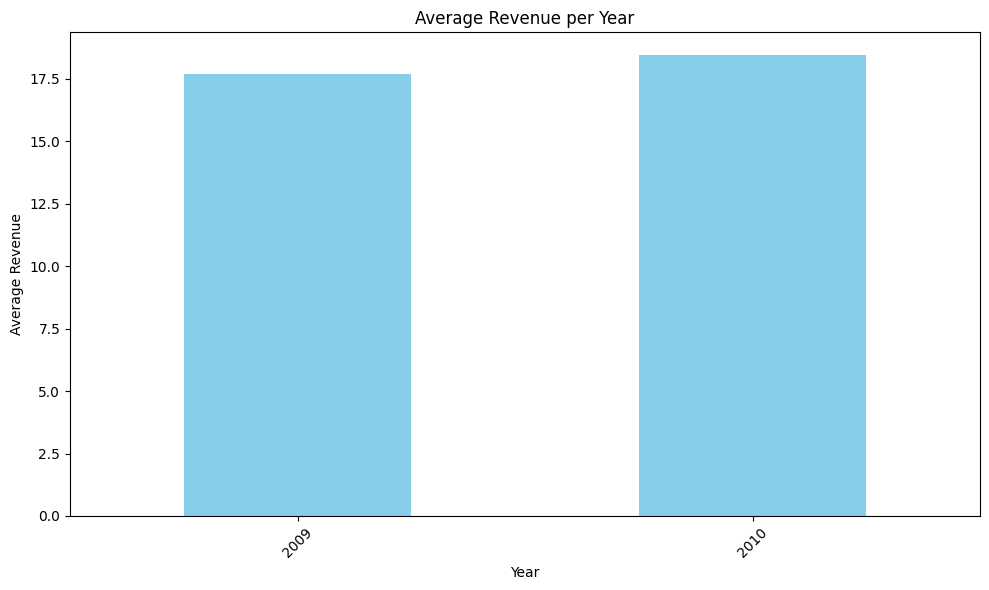

In [62]:
# Plotting
plt.figure(figsize=(10, 6))
average_revenue_per_year.plot(kind='bar', color='skyblue')
plt.title('Average Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation

Rata-rata pendapatan yang didapat dalam setiap transaksi yang terjadi selama tahun 2009 adalah sebesar $ 17.684777 sedangkan rata-rata pendapatan yang didapat dalam setiap transaksi yang terjadi selama tahun 2010 adalah sebesar $ 18.430896, jumlahnya meningkat itu artinya perusahaan cukup berhasil mengembangkan usahanya

## Section 2

### Filtering Data

#### Customers who finished their purchases

#### Customers who canceled their purchases

### Number of Finished and Canceled Transactions Each Year

### Cancellation Rate

### Interpretation